In [1]:
%matplotlib inline
%autosave 10
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')


Autosaving every 10 seconds


In [2]:
df = pd.read_csv('slim_airplanes.csv')

### Number of cancelled occurances per carrier

In [3]:
dfgroup = df.groupby(['UniqueCarrier'])
dfgroup.describe()

ArrDelay     CRSArrTime     CRSDepTime  \
UniqueCarrier                                                      
AA            count   66893.000000   68060.000000   68060.000000   
              mean        3.228081    1510.611872    1311.265339   
              std        43.688608     511.688606     491.748765   
              min       -73.000000       1.000000       5.000000   
              25%              NaN    1115.000000     900.000000   
              50%              NaN    1533.000000    1310.000000   
              75%              NaN    1928.000000    1720.000000   
              max      1971.000000    2359.000000    2359.000000   
AS            count   15770.000000   15888.000000   15888.000000   
              mean       -1.384718    1505.632805    1335.297583   
              std        26.734503     556.492487     518.953992   
              min       -69.000000       2.000000       5.000000   
              25%              NaN    1057.000000     905.000000   
              50%              NaN    1545.000000    1315.000000   
              75%              NaN    2014.000000    1800.000000   
              max       491.000000    2359.000000    2355.000000   
B6            count   24073.000000   24564.000000   24564.000000   
              mean        6.243800    1472.057605    1367.759852   
              std        40.352240     562.746644     515.564478   
              min       -70.000000       1.000000      30.000000   
              25%              NaN    1032.000000     919.000000   
              50%              NaN    1501.000000    1350.000000   
              75%              NaN    1952.000000    1829.000000   
              max       580.000000    2359.000000    2359.000000   
DL            count   79450.000000   79929.000000   79929.000000   
              mean       -0.114273    1507.390234    1328.712532   
              std        37.629776     492.596463     483.527920   
              min       -69.000000       1.000000       5.000000   
              25%              NaN    1117.000000     915.000000   
              50%              NaN    1525.000000    1315.000000   
...                            ...            ...            ...   
UA            std        44.603976     536.072373     494.583846   
              min       -76.000000       1.000000       1.000000   
              25%              NaN    1101.000000     900.000000   
              50%              NaN    1526.000000    1300.000000   
              75%              NaN    1930.000000    1730.000000   
              max      1073.000000    2359.000000    2359.000000   
US            count   16127.000000   16490.000000   16490.000000   
              mean        3.765672    1494.111947    1329.618314   
              std        33.128697     514.519405     502.636933   
              min       -59.000000       2.000000       5.000000   
              25%              NaN    1055.000000     915.000000   
              50%              NaN    1521.000000    1324.000000   
              75%              NaN    1921.000000    1745.000000   
              max       750.000000    2359.000000    2359.000000   
VX            count    5680.000000    5746.000000    5746.000000   
              mean        4.124120    1580.158545    1363.095023   
              std        34.105074     479.802236     467.210956   
              min       -70.000000       5.000000      10.000000   
              25%              NaN    1205.000000     925.000000   
              50%              NaN    1630.000000    1340.000000   
              75%              NaN    2010.000000    1735.000000   
              max       327.000000    2359.000000    2355.000000   
WN            count  113295.000000  114982.000000  114982.000000   
              mean        4.528161    1493.543642    1332.411725   
              std        32.833785     517.133462     480.636536   
              min       -68.000000       5.000000     500.000000   
              

In [4]:
for name, group in dfgroup:
    print('For carrier', name)
    cancelled = len(group[group['Cancelled'] == 1])
    total = len(group)
    ratio = cancelled / total
    print('Number of cancelled flights:', cancelled, '\nNumber of total flights:', total,
         'Ratio:', ratio)

For carrier AA
Number of cancelled flights: 963 
Number of total flights: 68060 Ratio: 0.014149280047017338
For carrier AS
Number of cancelled flights: 71 
Number of total flights: 15888 Ratio: 0.004468781470292045
For carrier B6
Number of cancelled flights: 424 
Number of total flights: 24564 Ratio: 0.017261032405145742
For carrier DL
Number of cancelled flights: 314 
Number of total flights: 79929 Ratio: 0.0039284865317969694
For carrier EV
Number of cancelled flights: 1333 
Number of total flights: 51633 Ratio: 0.025816822574709974
For carrier F9
Number of cancelled flights: 54 
Number of total flights: 8400 Ratio: 0.0064285714285714285
For carrier HA
Number of cancelled flights: 19 
Number of total flights: 7115 Ratio: 0.002670414617006325
For carrier MQ
Number of cancelled flights: 1244 
Number of total flights: 26607 Ratio: 0.04675461344758898
For carrier NK
Number of cancelled flights: 196 
Number of total flights: 10758 Ratio: 0.01821899981409184
For carrier OO
Number of cancel

### Carriers with cancel percentage higher than 3%

In [5]:
for name, group in dfgroup:
    cancelled = len(group[group['Cancelled'] == 1])
    total = len(group)
    ratio = cancelled / total
    if (ratio > 0.03):
        print('Carrier', name, 'has ratio', ratio);

Carrier MQ has ratio 0.04675461344758898


### Plotting ratios

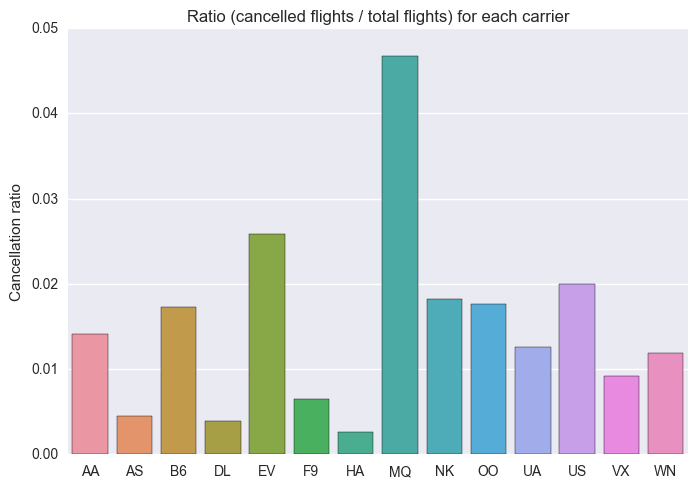

In [8]:
x = []
xstrings = []
y = []
for name, group in dfgroup:
    cancelled = len(group[group['Cancelled'] == 1])
    total = len(group)
    ratio = cancelled / total
    x.append(len(x))
    xstrings.append(name)
    y.append(ratio)
    
# plt.plot(x, y, 'bs')

sns.barplot(x=x, y=y)
# plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, xstrings)
plt.ylabel('Cancellation ratio')
plt.title('Ratio (cancelled flights / total flights) for each carrier')
plt.savefig('graph/ratio_cancelled_total.png', bbox_inches='tight')
# plt.show()

### Number of cancellations for each flight number

### Correlation between distance traveled and cancellations

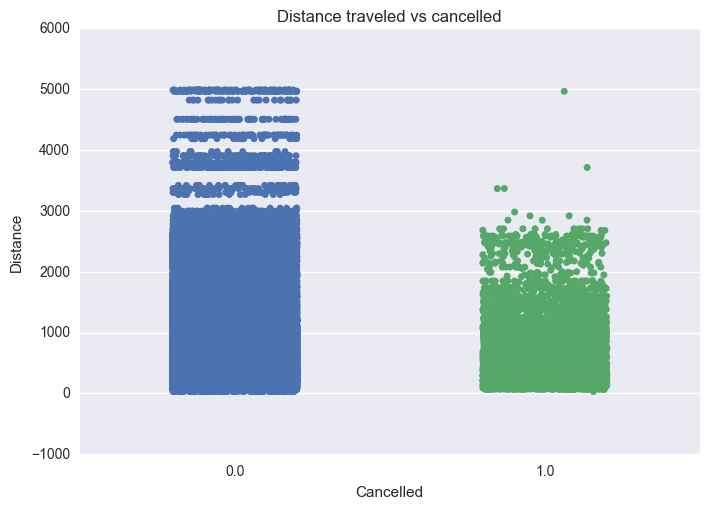

In [23]:
sns.stripplot(x="Cancelled", y="Distance", data=df, jitter=0.2)
plt.title('Distance traveled vs cancelled')
plt.savefig('graph/ratio_cancelled_distance.png', bbox_inches='tight')

In [71]:
cancel = df[df['Cancelled'] == 1]
cancel = cancel.ix[:, 'Cancelled']
color = ['red', 'blue']
plt.scatter(df['Distance'], df['Cancelled'] )

27        1.0
28        1.0
59        1.0
60        1.0
89        1.0
90        1.0
119       1.0
120       1.0
155       1.0
156       1.0
188       1.0
277       1.0
278       1.0
307       1.0
308       1.0
338       1.0
339       1.0
344       1.0
393       1.0
394       1.0
422       1.0
423       1.0
479       1.0
480       1.0
509       1.0
510       1.0
535       1.0
536       1.0
567       1.0
568       1.0
         ... 
897958    1.0
898041    1.0
898044    1.0
898045    1.0
898061    1.0
898064    1.0
898074    1.0
898115    1.0
898122    1.0
898205    1.0
898301    1.0
898360    1.0
898361    1.0
898465    1.0
898543    1.0
898651    1.0
898809    1.0
898818    1.0
898838    1.0
898854    1.0
898855    1.0
898858    1.0
898921    1.0
899047    1.0
899063    1.0
899072    1.0
899083    1.0
899101    1.0
899133    1.0
899150    1.0
Name: Cancelled, dtype: float64

### Delay vs cancellation

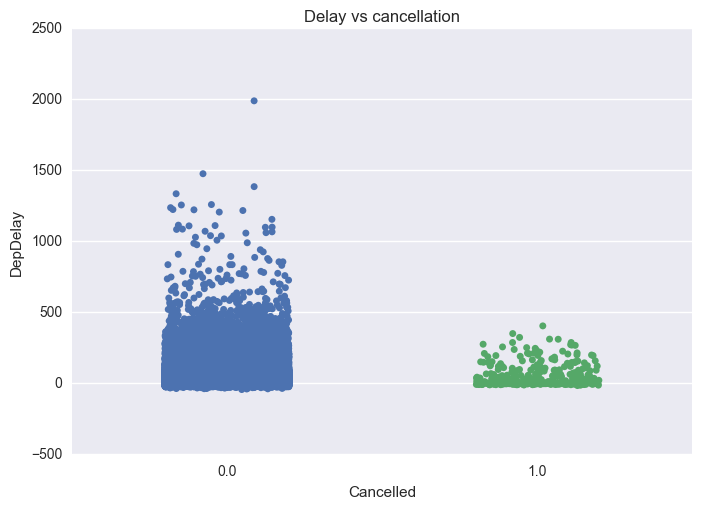

In [24]:
sns.stripplot(x="Cancelled", y="DepDelay", data=df, jitter=0.2)
plt.title('Delay vs cancellation')
plt.savefig('graph/ratio_cancelled_depdelay.png', bbox_inches='tight')

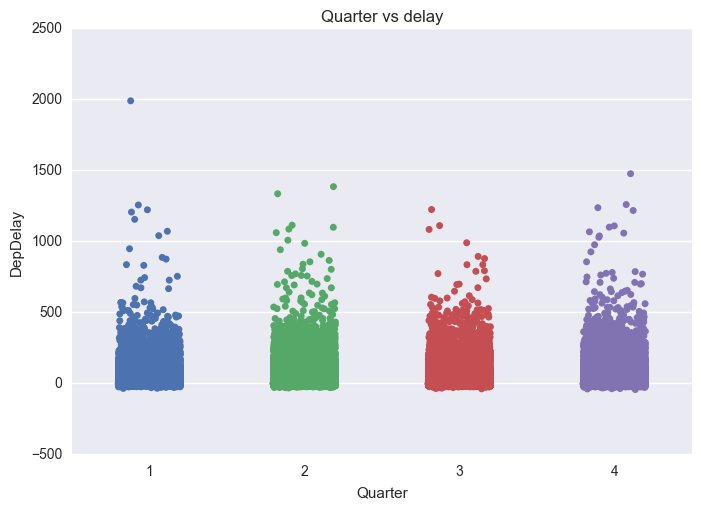

In [28]:
sns.stripplot(x="Quarter", y="DepDelay", data=df, jitter=0.2)
plt.title('Quarter vs delay')
plt.savefig('graph/quarter_vs_delay.png', bbox_inches='tight')

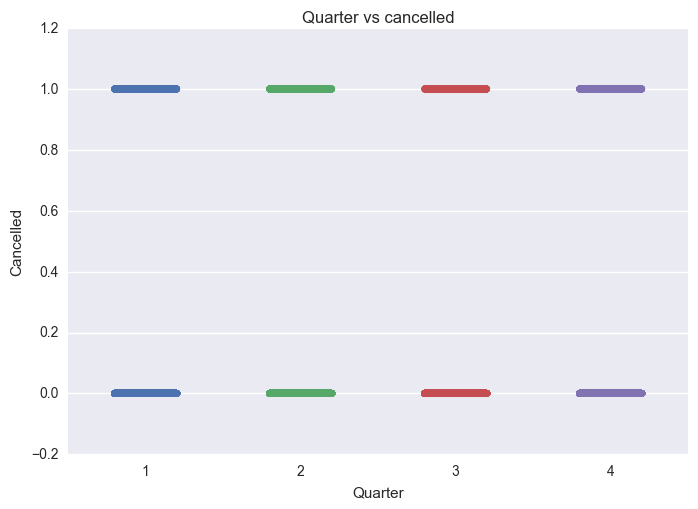

In [27]:
sns.stripplot(x="Quarter", y="Cancelled", data=df, jitter=0.2)
plt.title('Quarter vs cancelled')
plt.savefig('graph/quarter_vs_cancelled.png', bbox_inches='tight')

In [ ]:
sns.stripplot(x="FlightNum", y="DepDelay", data=df)
plt.title('Flight number vs delay')
plt.savefig('graph/flight_depdelay.png', bbox_inches='tight')